c:\Users\Seamus McMurrer\AppData\Local\Programs\Python\Python310\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


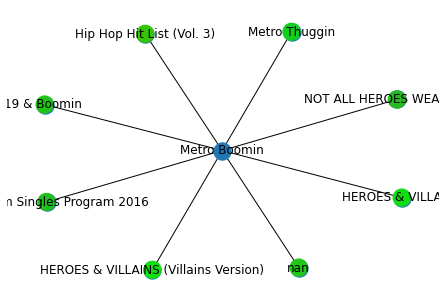

In [17]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

artist_graph = nx.Graph()

path = 'FinalDatasets/MetroBoomin.csv'

def cleanText(text):
    # takes in text and returns text lowercase with only whitespace and alphanumeric characters
    retText = ''
    text = str(text)
    try:
        for ch in text.lower():
            if ch.isalpha() or ch == ' ' or ch.isnumeric():
                retText += ch
    except Exception as e:
        print(f'UwU yowr ewwow is: {e} fow text {text}')
    return retText

def csvToDF(location):
    df = pd.read_csv(location)
    df['Lyrics'] = cleanText(df['Lyrics'])
    return df

metroDataFrame = csvToDF(path)

albumDict = {}

for _, row in metroDataFrame.iterrows():
    artist = row['Artist']
    album = row['Album']
    song = row['Song Title']
    pos = row['pos']
    neg = row['neg']
    neu = row['neu']

    if artist not in albumDict:
        albumDict[artist] = {}

    if album not in albumDict[artist]:
        albumDict[artist][album] = {
            'songs': [],
            'posScores': [],
            'negScores': [],
            'neuScores': []
        }
    albumDict[artist][album]['songs'].append(song)
    albumDict[artist][album]['posScores'].append(pos)
    albumDict[artist][album]['negScores'].append(neg)
    albumDict[artist][album]['neuScores'].append(neu)


for artist, albums in albumDict.items():
    artist_graph.add_node(artist, node_type='artist')

    for album, albumInfo in albums.items():
        avgPos = sum(albumInfo['posScores']) / len(albumInfo['posScores'])
        avgNeg = sum(albumInfo['negScores']) / len(albumInfo['negScores'])
        avgNeu = sum(albumInfo['neuScores']) / len(albumInfo['neuScores'])

        color = (avgPos, avgNeu, avgNeg)

        artist_graph.add_node(album, node_type='album', color=color)
        artist_graph.add_edge(artist, album)


pos = nx.spring_layout(artist_graph)
album_colors = [artist_graph.nodes[n]['color'] for n in artist_graph.nodes if artist_graph.nodes[n]['node_type'] == 'album']

nx.draw(artist_graph, pos, with_labels=True, cmap=plt.cm.RdYlGn)
nx.draw_networkx_nodes(artist_graph, pos, nodelist=[n for n in artist_graph.nodes if artist_graph.nodes[n]['node_type'] == 'album'], node_color=album_colors, cmap=plt.cm.RdYlGn)

